# Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import random_projection
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import math
import warnings
warnings.filterwarnings('ignore')

from utils import *
data_path = "../data/"

## Host Since Mapping

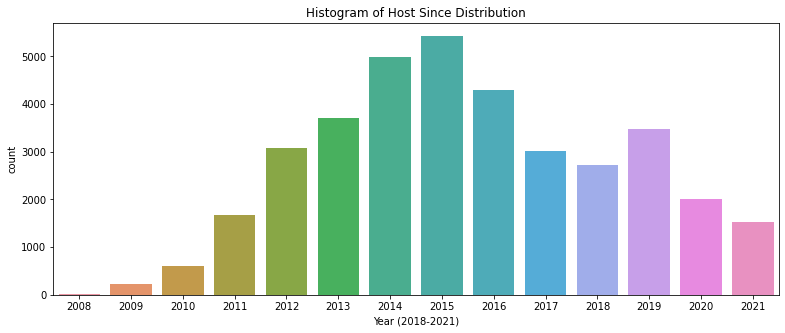

In [2]:
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[['host_since']]
df = df.dropna()
df = host_year_only(df)
sort_year = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

fig = plt.figure(figsize = (13, 5))
ax = sns.countplot(x="host_since", data=df, order = sort_year)
plt.title("Histogram of Host Since Distribution")
plt.xlabel("Year (2018-2021)")
plt.show()

# print(df['bathrooms_text'].unique())
# print(df['beds'].unique())
# print(df['amenities'][0])

## Superhost T/F Binary Classification

### 1. Host-Realted Features (KNN, Logistic Regression, Gradient Boosting Tree Classification)

Sample Size: 20141
KNN CV score: 0.7720332002311906
KNN Accuracy: 0.7833209233060313
KNN Confusion Matrix:
 [[2652  267]
 [ 606  504]]


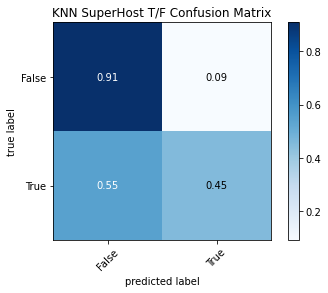

Logistic CV score: 0.7356628230558102
Logistic Accuracy: 0.7222635889798957
Lgoistic Confusion Matrix:
 [[2890   29]
 [1090   20]]


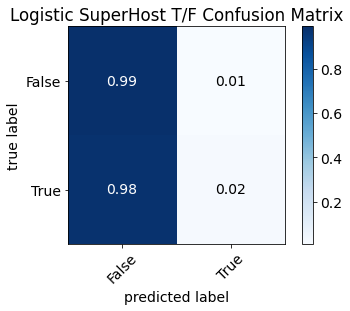

Gradient Boosting CV score: 0.7517375597837779
Gradient Boosting Accuracy: 0.7468354430379747
Gradient Boosting Confusion Matrix:
 [[2866   53]
 [ 967  143]]


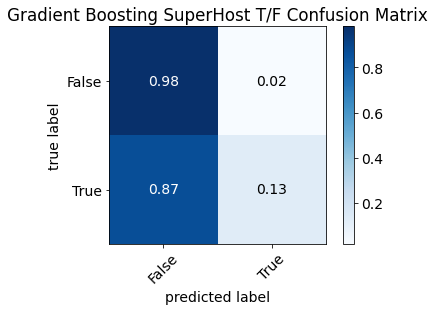

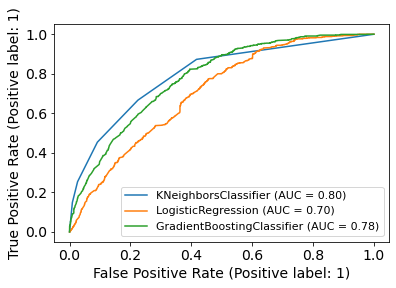

In [3]:
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[['host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic', \
         'host_identity_verified', 'host_since', 'host_is_superhost']]
df = df.dropna()
print("Sample Size:", len(df))

df = df_binarization(df, 'host_has_profile_pic') # t/f -> 1/0
df = df_binarization(df, 'host_identity_verified') # t/f -> 1/0
df = host_nth_year(df)
x_raw = df[['host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic',\
            'host_identity_verified', 'host_since']]
y_raw = df['host_is_superhost']
y_encode = y_binarization(y_raw) # t/f -> 1/0

x, x_test, y, y_test = train_test_split(x_raw, y_encode, test_size=0.2, random_state=40)

# knn
knn_model = KNeighborsClassifier()
CV = cross_val_score(knn_model, x, y, cv=5, scoring='accuracy')
print("KNN CV score:", CV.mean())
knn_model.fit(x, y) # get the model
y_pred = knn_model.predict(x_test) 
print ("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'KNN SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

# logistic
logistic_model = LogisticRegression(solver='saga')
CV = cross_val_score(logistic_model, x, y, cv=5, scoring='accuracy')
print("Logistic CV score:", CV.mean())
logistic_model.fit(x, y) # get the model
y_pred = logistic_model.predict(x_test) 
print ("Logistic Accuracy:", accuracy_score(y_test, y_pred))
print("Lgoistic Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'Logistic SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

# gbt
gbc_model = GradientBoostingClassifier()
CV = cross_val_score(gbc_model, x, y, cv=5, scoring='accuracy')
print("Gradient Boosting CV score:", CV.mean())
gbc_model.fit(x, y) # get the model
y_pred = gbc_model.predict(x_test) 
print ("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'Gradient Boosting SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

knn_disp = plot_roc_curve(knn_model, x_test, y_test)
log_disp = plot_roc_curve(logistic_model, x_test, y_test, ax=knn_disp.ax_)
gbc_disp = plot_roc_curve(gbc_model, x_test, y_test, ax=knn_disp.ax_)
plt.legend(fontsize=11)
plt.show()

### 2. Property-Related Features (KNN, Logistic Regression, Gradient Boosting Tree Classification)

Sample Size: 27608
KNN CV score: 0.7725255102589864
KNN Accuracy: 0.7680188337558855
KNN Confusion Matrix:
 [[3857  415]
 [ 866  384]]


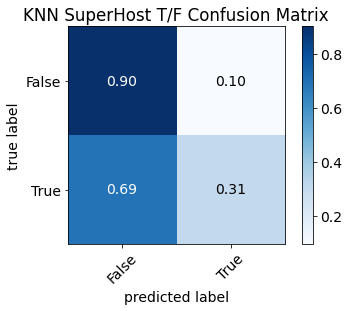

Logistic CV score: 0.7732954684629831
Logistic Accuracy: 0.7705541470481709
Logistic Confusion Matrix:
 [[4125  147]
 [1120  130]]


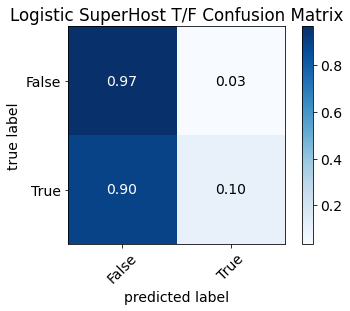

Gradient Boosting CV score: 0.8334237456356378
Gradient Boosting Accuracy: 0.8391886997464687
Gradient Boosting Confusion Matrix:
 [[4038  234]
 [ 654  596]]


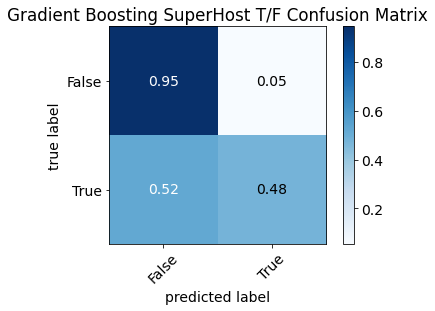

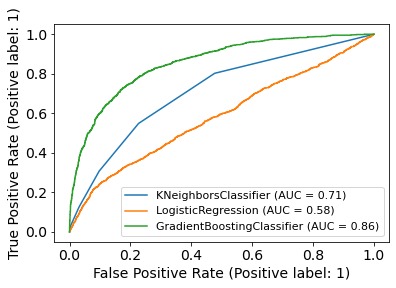

In [4]:
df = pd.read_csv(data_path + "listings_detail.csv") # load data

# columns will be used
df = df[['neighbourhood_group_cleansed', 'room_type', 'number_of_reviews',\
         'number_of_reviews_l30d', 'number_of_reviews_ltm', 'reviews_per_month',\
         'review_scores_rating', 'price', 'instant_bookable',\
         'host_is_superhost']]
df = df.dropna() # drop null
print("Sample Size:", len(df))

df= df_binarization(df, 'instant_bookable') # t/f -> 1/0
df = str_to_int(df, 'neighbourhood_group_cleansed') # string -> int mapping
df = str_to_int(df, 'room_type') # string -> int mapping
x_raw = df[['neighbourhood_group_cleansed', 'room_type', 'number_of_reviews',\
            'number_of_reviews_l30d', 'number_of_reviews_ltm', 'reviews_per_month',\
            'review_scores_rating', 'price', 'instant_bookable']]
y_raw = df['host_is_superhost']
y_encode = y_binarization(y_raw) # t/f -> 1/0

x, x_test, y, y_test = train_test_split(x_raw, y_encode, test_size=0.2, random_state=40) # train/test split

# knn
knn_model = KNeighborsClassifier()
CV = cross_val_score(knn_model, x, y, cv=5, scoring='accuracy')
print("KNN CV score:", CV.mean())
knn_model.fit(x, y) # get the model
y_pred = knn_model.predict(x_test) 
print ("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'KNN SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

# logistic
logistic_model = LogisticRegression(solver='saga')
CV = cross_val_score(logistic_model, x, y, cv=5, scoring='accuracy')
print("Logistic CV score:", CV.mean())
logistic_model.fit(x, y) # get the model
y_pred = logistic_model.predict(x_test) 
print ("Logistic Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'Logistic SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

# gbt
gbc_model = GradientBoostingClassifier()
CV = cross_val_score(gbc_model, x, y, cv=5, scoring='accuracy')
print("Gradient Boosting CV score:", CV.mean())
gbc_model.fit(x, y) # get the model
y_pred = gbc_model.predict(x_test) 
print ("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'Gradient Boosting SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

knn_disp = plot_roc_curve(knn_model, x_test, y_test)
log_disp = plot_roc_curve(logistic_model, x_test, y_test, ax=knn_disp.ax_)
gbc_disp = plot_roc_curve(gbc_model, x_test, y_test, ax=knn_disp.ax_)
plt.legend(fontsize=11)
plt.show()

## Price Prediction

### 1. Naive Price Prediction (Linear Regression, Gradient Boosting Regression)

In [5]:
# price prediction with superhost, neighborhood, room_type, and reviews
df = pd.read_csv(data_path + "listings_detail.csv") # load data
df = df[['host_is_superhost', 'neighbourhood_group_cleansed', \
         'host_has_profile_pic', 'room_type',\
         'instant_bookable', 'host_since',\
         'host_identity_verified', 'reviews_per_month',\
         'number_of_reviews', 'number_of_reviews_l30d', 'number_of_reviews_ltm',\
         'review_scores_rating', 'price']]
df = df.dropna() # drop null
print("Sample Size:", len(df))

df= df_binarization(df, 'host_has_profile_pic') # t/f -> 1/0
df= df_binarization(df, 'host_identity_verified') # t/f -> 1/0
df= df_binarization(df, 'instant_bookable') # t/f -> 1/0
df= df_binarization(df, 'host_is_superhost') # t/f -> 1/0
df = str_to_int(df, 'neighbourhood_group_cleansed') # string -> int mapping
df = str_to_int(df, 'room_type') # string -> int mapping
df = host_nth_year(df)
x_raw = df[['host_is_superhost', 'neighbourhood_group_cleansed', \
         'host_has_profile_pic', 'room_type',\
         'instant_bookable', 'host_since',\
         'host_identity_verified', 'reviews_per_month',\
         'number_of_reviews', 'number_of_reviews_l30d', 'number_of_reviews_ltm',\
         'review_scores_rating']]
y_raw = df['price']
x, x_test, y, y_test = train_test_split(x_raw, y_raw, test_size=0.2, random_state=40)

# linear
linear_model = LinearRegression()
CV = cross_val_score(linear_model, x, y, cv=5, scoring='r2')
print("Linear CV score:", CV.mean())
linear_model.fit(x, y) # get the model
print("Linear r2:", linear_model.score(x_test, y_test))

# gbt
gbr_model = GradientBoostingRegressor()
CV = cross_val_score(gbr_model, x, y, cv=5, scoring='r2')
print("Gradient Boosting CV score:", CV.mean())
gbr_model.fit(x, y) # get the model
print("Gradient Boosting r2:", gbr_model.score(x_test, y_test))

Sample Size: 27608
Linear CV score: 0.04421255171861769
Linear r2: 0.03347649626839733
Gradient Boosting CV score: 0.046548138178703624
Gradient Boosting r2: 0.05444489839424249


### 2. Price Prediction With Range

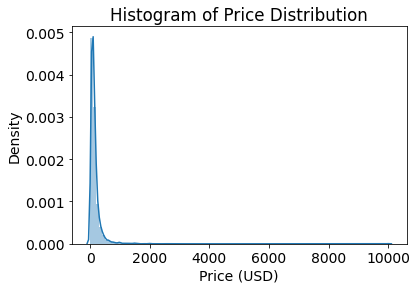

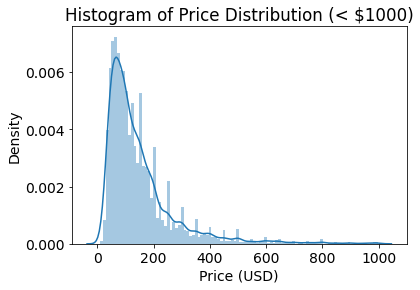

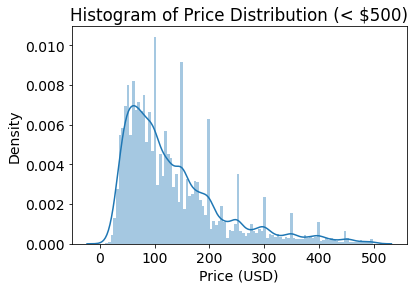

In [6]:
# Bin the price range
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['price'].notna()] # drop empty reviews
df = df[df['price'] != 0] # drop $0 lists
sns.distplot(df['price'], kde=True, bins=100, hist=True)
plt.title("Histogram of Price Distribution")
plt.xlabel("Price (USD)")
plt.show() # original bin, outlier=1000

df = df[df.price < 1000]
sns.distplot(df['price'], kde=True, bins=100, hist=True) # $100 bins
plt.title("Histogram of Price Distribution (< $1000)")
plt.xlabel("Price (USD)")
plt.show() # -> outlier=500

df = df[df.price < 500]
sns.distplot(df['price'], kde=True, bins=100, hist=True) # $100 bins
plt.title("Histogram of Price Distribution (< $500)")
plt.xlabel("Price (USD)")
plt.show() # each bin size -> $100

In [7]:
# price prediction with superhost, neighborhood, room_type, and reviews
df = pd.read_csv(data_path + "listings_detail.csv") # load data
df = df[['host_is_superhost', 'neighbourhood_group_cleansed', \
         'host_has_profile_pic', 'room_type',\
         'instant_bookable', 'host_since',\
         'host_identity_verified', 'reviews_per_month',\
         'number_of_reviews', 'number_of_reviews_l30d', 'number_of_reviews_ltm',\
         'review_scores_rating', 'price']]
df = df.dropna() # drop null
df = df[df.price < 500] # even dropped, sample size is over 20k
print("Sample Size:", len(df))

df= df_binarization(df, 'host_has_profile_pic') # t/f -> 1/0
df= df_binarization(df, 'host_identity_verified') # t/f -> 1/0
df= df_binarization(df, 'instant_bookable') # t/f -> 1/0
df= df_binarization(df, 'host_is_superhost') # t/f -> 1/0
df = str_to_int(df, 'neighbourhood_group_cleansed') # string -> int mapping
df = str_to_int(df, 'room_type') # string -> int mapping
df = host_nth_year(df)
x_raw = df[['host_is_superhost', 'neighbourhood_group_cleansed', \
         'host_has_profile_pic', 'room_type',\
         'instant_bookable', 'host_since',\
         'host_identity_verified', 'reviews_per_month',\
         'number_of_reviews', 'number_of_reviews_l30d', 'number_of_reviews_ltm',\
         'review_scores_rating']]
y_raw = price_bin(df)
y_encode = df['price']
x, x_test, y, y_test = train_test_split(x_raw, y_encode, test_size=0.2, random_state=40)

# linear
linear_model = LinearRegression()
CV = cross_val_score(linear_model, x, y, cv=5, scoring='r2')
print("Linear CV score:", CV.mean())
linear_model.fit(x, y) # get the model
print("Linear r2:", linear_model.score(x_test, y_test))

# gbt
gbr_model = GradientBoostingRegressor()
CV = cross_val_score(gbr_model, x, y, cv=5, scoring='r2')
print("Gradient Boosting CV score:", CV.mean())
gbr_model.fit(x, y) # get the model
print("Gradient Boosting r2:", gbr_model.score(x_test, y_test))

Sample Size: 26787
Linear CV score: 0.23129820042153226
Linear r2: 0.251106702876324
Gradient Boosting CV score: 0.31939271075575726
Gradient Boosting r2: 0.32882551534510607
